# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
## Data Collection

import pandas_datareader as pdr

In [2]:
## This is a part of real time data collection,so it will only run when we collect the data and use that for the same day.

#df = pdr.get_data_tiingo("AAPL", api_key = "27de882fc62706b943c1bad995bab8660ce005d5")

In [3]:
#df.to_csv("AAPL.csv")

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("AAPL.csv")

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-04 00:00:00+00:00,169.80,172.6200,169.63,172.48,32115052,40.363832,41.034185,40.323420,41.000905,128460208,0.0,1.0
1,AAPL,2017-12-05 00:00:00+00:00,169.64,171.5200,168.40,169.06,27008428,40.325797,40.772700,40.031032,40.187923,108033712,0.0,1.0
2,AAPL,2017-12-06 00:00:00+00:00,169.01,170.2047,166.46,167.50,28224357,40.176038,40.460034,39.569867,39.817089,112897428,0.0,1.0
3,AAPL,2017-12-07 00:00:00+00:00,169.32,170.4400,168.91,169.03,24469613,40.249729,40.515968,40.152266,40.180792,97878452,0.0,1.0
4,AAPL,2017-12-08 00:00:00+00:00,169.37,171.0000,168.82,170.49,23096872,40.261615,40.649088,40.130872,40.527854,92387488,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-11-23 00:00:00+00:00,151.07,151.83,149.340,149.450,58301395,151.07,151.83,149.340,149.450,58301395,0.0,1.0
1253,AAPL,2022-11-25 00:00:00+00:00,148.11,148.88,147.120,148.305,35195860,148.11,148.88,147.120,148.305,35195860,0.0,1.0
1254,AAPL,2022-11-28 00:00:00+00:00,144.22,146.64,143.380,145.140,69346522,144.22,146.64,143.380,145.140,69346522,0.0,1.0
1255,AAPL,2022-11-29 00:00:00+00:00,141.17,144.81,140.355,144.290,83763803,141.17,144.81,140.355,144.290,83763803,0.0,1.0
1256,AAPL,2022-11-30 00:00:00+00:00,148.03,148.72,140.550,141.395,111380880,148.03,148.72,140.550,141.395,111380880,0.0,1.0


In [8]:
df1 = df.reset_index()["close"]

In [9]:
df1

0       169.80
1       169.64
2       169.01
3       169.32
4       169.37
         ...  
1252    151.07
1253    148.11
1254    144.22
1255    141.17
1256    148.03
Name: close, Length: 1257, dtype: float64

In [10]:
df1.shape

(1257,)

In [11]:
import matplotlib.pyplot as plt

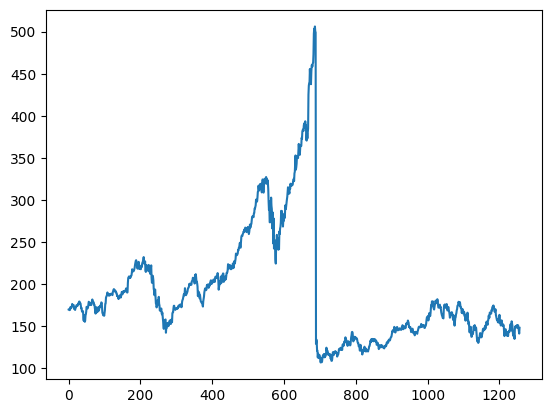

In [12]:
plt.plot(df1)

In [13]:
## LSTM are sensitive to the scale of the data, so we will apply MinMax scaler

import numpy as np

In [14]:
df1

0       169.80
1       169.64
2       169.01
3       169.32
4       169.37
         ...  
1252    151.07
1253    148.11
1254    144.22
1255    141.17
1256    148.03
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

C:\Users\dell\anaconda3\envs\tensorflow_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
df1

array([[0.15769568],
       [0.15729493],
       [0.15571697],
       ...,
       [0.09362555],
       [0.08598622],
       [0.10316844]])

In [17]:
print(df1)

[[0.15769568]
 [0.15729493]
 [0.15571697]
 ...
 [0.09362555]
 [0.08598622]
 [0.10316844]]


In [18]:
## Split the dataset in to train test split

training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(817, 440)

In [20]:
train_data

array([[1.57695679e-01],
       [1.57294928e-01],
       [1.55716969e-01],
       [1.56493425e-01],
       [1.56618660e-01],
       [1.64884158e-01],
       [1.62454602e-01],
       [1.63882279e-01],
       [1.63757044e-01],
       [1.68140263e-01],
       [1.74276769e-01],
       [1.69567940e-01],
       [1.69092048e-01],
       [1.70745147e-01],
       [1.70745147e-01],
       [1.59624296e-01],
       [1.59699436e-01],
       [1.60901691e-01],
       [1.56268003e-01],
       [1.63857232e-01],
       [1.63782091e-01],
       [1.65785848e-01],
       [1.70720100e-01],
       [1.69092048e-01],
       [1.69041954e-01],
       [1.68941766e-01],
       [1.71421415e-01],
       [1.75954915e-01],
       [1.73700689e-01],
       [1.80989355e-01],
       [1.81390106e-01],
       [1.79386349e-01],
       [1.75729493e-01],
       [1.75829681e-01],
       [1.68766437e-01],
       [1.60976832e-01],
       [1.61978710e-01],
       [1.53087038e-01],
       [1.50607389e-01],
       [1.51759549e-01],


In [21]:
test_data

array([[0.03651847],
       [0.02384471],
       [0.0356794 ],
       [0.03291171],
       [0.03787101],
       [0.03554164],
       [0.04295554],
       [0.04691296],
       [0.04488416],
       [0.03428929],
       [0.03293676],
       [0.04145272],
       [0.03932373],
       [0.03318723],
       [0.03443957],
       [0.03599249],
       [0.03644333],
       [0.03271133],
       [0.0383469 ],
       [0.04047589],
       [0.04773951],
       [0.04851597],
       [0.0527489 ],
       [0.05891046],
       [0.06551033],
       [0.06111459],
       [0.06910457],
       [0.0630933 ],
       [0.0692799 ],
       [0.0684283 ],
       [0.0701315 ],
       [0.06579837],
       [0.0667752 ],
       [0.06286788],
       [0.06882905],
       [0.06983093],
       [0.06900438],
       [0.06697558],
       [0.06672511],
       [0.06166562],
       [0.0643707 ],
       [0.05262367],
       [0.05324984],
       [0.05735755],
       [0.05853475],
       [0.05011897],
       [0.04776456],
       [0.039

In [22]:
import numpy

## Convert an array of values into a dataset matrix

def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]               ### i = 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [23]:
## reshape into (x = t,t+1,t+2,t+3)    and   (y = t+4)

time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [24]:
print(x_train.shape)

(716, 100)


In [25]:
print(y_train.shape)

(716,)


In [26]:
print(x_test.shape)

(339, 100)


In [27]:
print(y_test.shape)

(339,)


In [28]:
## reshape input to be [samples,time steps,features] which is required for LSTM

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [29]:
## create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 22s 602ms/step - loss: 0.0476 - val_loss: 0.0031
Epoch 2/100
12/12 [==============================] - 4s 321ms/step - loss: 0.0163 - val_loss: 0.0076
Epoch 3/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0115 - val_loss: 3.8434e-04
Epoch 4/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0095 - val_loss: 3.8578e-04
Epoch 5/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0086 - val_loss: 8.4948e-04
Epoch 6/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0070 - val_loss: 4.1367e-04
Epoch 7/100
12/12 [==============================] - 4s 318ms/step - loss: 0.0064 - val_loss: 3.6942e-04
Epoch 8/100
12/12 [==============================] - 4s 318ms/step - loss: 0.0057 - val_loss: 7.1434e-04
Epoch 9/100
12/12 [==============================] - 4s 317ms/step - loss: 0.0055 - val_loss: 5.6938e-04
Epoch 10/100
12/12 [==============================] - 4s 315ms

12/12 [==============================] - 4s 314ms/step - loss: 0.0015 - val_loss: 2.3245e-04
Epoch 79/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0014 - val_loss: 2.3973e-04
Epoch 80/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0013 - val_loss: 2.6379e-04
Epoch 81/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0015 - val_loss: 2.5884e-04
Epoch 82/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0013 - val_loss: 2.5765e-04
Epoch 83/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0014 - val_loss: 2.8017e-04
Epoch 84/100
12/12 [==============================] - 4s 316ms/step - loss: 0.0015 - val_loss: 2.5145e-04
Epoch 85/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0013 - val_loss: 2.6084e-04
Epoch 86/100
12/12 [==============================] - 4s 312ms/step - loss: 0.0014 - val_loss: 2.4495e-04
Epoch 87/100
12/12 [==============================] - 4s 31

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.9.1'

In [35]:
## Let's do the prediction and check the performance matrix

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 1s 71ms/step


In [36]:
## Transform back to the original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [37]:
## Calculate RMSE Performance matrix

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

230.96659814538398

In [38]:
## Test data RMSE

math.sqrt(mean_squared_error(y_test,test_predict))

157.55663479845776

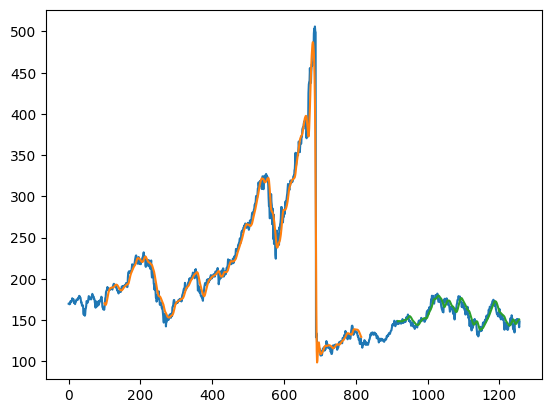

In [39]:
## Plotting 

## Shift train predictions for plotting

look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

## shift test predictions for plotting

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

## plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)

440

In [41]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [43]:
temp_input

[0.0977332498434565,
 0.09680651221039449,
 0.10427050720100184,
 0.10852849092047584,
 0.1007639323731997,
 0.11060738885410137,
 0.11571696931747022,
 0.12150281778334371,
 0.1183469004383218,
 0.11549154664996863,
 0.11211020663744514,
 0.12510958046336873,
 0.12651221039448962,
 0.139436443331246,
 0.13693174702567307,
 0.13317470256731367,
 0.1485034439574201,
 0.1477019411396368,
 0.14654978083907322,
 0.1453475266123982,
 0.14547276142767684,
 0.15629304946775202,
 0.1544145272385723,
 0.16345648090169063,
 0.16618659987476514,
 0.16578584846587346,
 0.1695929868503444,
 0.1685911083281152,
 0.16200375704445835,
 0.15211020663744512,
 0.15125860989355033,
 0.15201001878522225,
 0.15827175954915462,
 0.142216656230432,
 0.1366061365059486,
 0.13041953663118344,
 0.12618659987476516,
 0.12804007514088916,
 0.1226549780839073,
 0.1194489668127739,
 0.12303068252974325,
 0.1192736380713838,
 0.12656230432060112,
 0.14174076393237317,
 0.1177207263619286,
 0.12140262993112083,
 0.114

In [44]:
## demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10790455]
101
1 day input [0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866
 0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579
 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477
 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487
 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838
 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338
 0.07020664 0.10026299 0.10735128 0.

8 day output [[0.11045353]]
9 day input [0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812 0.08909205
 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368
 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435
 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299
 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375
 0.10311835 0.10855354

16 day output [[0.11617661]]
17 day input [0.14770194 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453
 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376
 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614
 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068
 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882
 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971
 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386
 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844 0.10790455
 0.10733027 0.107174

24 day output [[0.12183409]]
25 day input [0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579
 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477
 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487
 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838
 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338
 0.07020664 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201
 0.10990607 0.11133375 0.10311835 0.10855354 0.11078272 0.10336882
 0.09362555 0.08598622 0.10316844 0.10790455 0.10733027 0.10717496
 0.10736914 0.10780365 0.10838371 0.10904286 0.10974021 0.11045353
 0.11117165 0.11189009

In [45]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df1)

1257

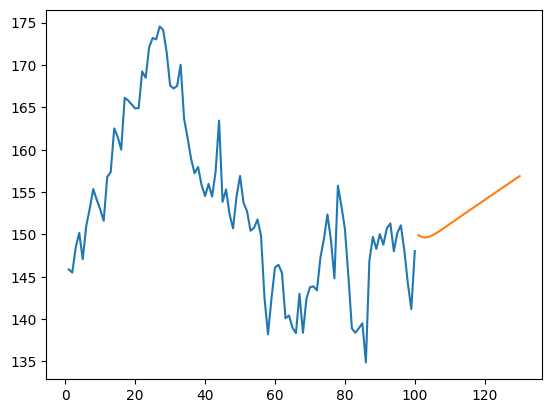

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

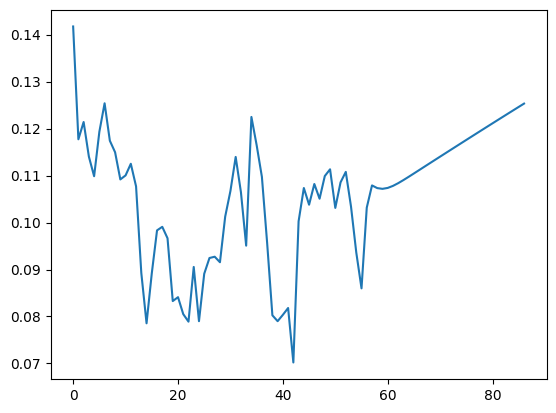

In [49]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

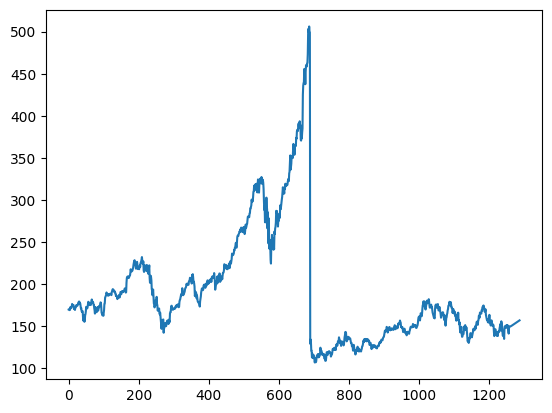

In [50]:
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)